In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##################################################################

def simandoux(VSH,RT,PHI,a=0.62,m=2.15,Rw = 0.015,Rsh = 4.00):
    Sw1 = (a*Rw)/(2.0*(PHI**m))
    Sw2 = (VSH/Rsh)**2
    Sw3 = (4*(PHI**m))/(a*Rw*RT)
    Sw4 = VSH/Rsh
    
    Sw = Sw1*(np.sqrt(Sw2 + Sw3) - Sw4)
    return Sw

##################################################################

def vsh_1(GR):
    #------------------------#
    n = len(GR)
    GR = list(GR)
    GR_min = min(GR)
    GR_max = max(GR)
    #------------------------#
    VSH = []
    for i in range(n):
        VSH.append(
            0.083*((2**(3.70*((GR[i] - GR_min)/(GR_max - GR_min) ) ))-1.0)
        )
    return VSH
        
##################################################################

def graficos_3(prof,prop1,prop2,prop3,label1 = 'ILD',label2 = 'GR', label3 = 'NPHI'):

    ### Graficos
    fig, (ax1, ax2, ax3) = plt.subplots(1,3) # 3 cruvas = 3 subplots
    fig.set_size_inches(10, 9) # tamanho da figura | polegadas

    #_____________________________________________________#

    ax1.plot(prop1,prof,'-r',linewidth = 1)
    ax1.invert_yaxis()
    ax1.grid()
    ax1.set_title(label1, fontsize=16)

    #_____________________________________________________#

    ax2.plot(prop2,prof,'-m',linewidth = 1)
    ax2.invert_yaxis()
    ax2.grid()
    ax2.set_title(label2, fontsize=16)
    
    #_____________________________________________________#
    
    ax3.plot(prop3,prof,'-g',linewidth = 1)
    ax3.invert_yaxis()
    ax3.grid()
    ax3.set_title(label3, fontsize=16)

    plt.show()

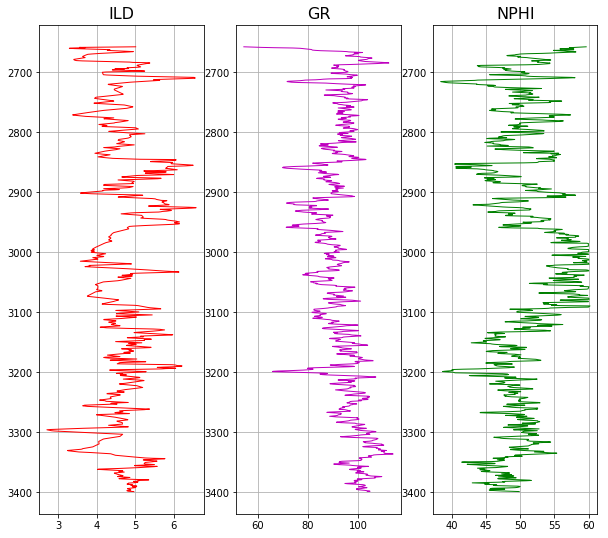

In [2]:
url = 'DP1.las'

cabecalho = ['PROF','ILD','GR','NPHI']

curvas = [0,2,5,9]

dado_raw = pd.read_csv(url, header=43,usecols=curvas, sep='\s+',names=cabecalho)

dado_raw = dado_raw.loc[(dado_raw['PROF'] >= 2200) & (dado_raw['PROF']  < 3400)]

# removendo dummies
DP1 = dado_raw.loc[(dado_raw['ILD']  != -999.00000) &
                    (dado_raw['GR']  != -999.00000) &
                    (dado_raw['NPHI']  != -999.00000)
                  ]

#-------------------------------------------------------------------------------------#
graficos_3(DP1['PROF'],DP1['ILD'],DP1['GR'],DP1['NPHI'])

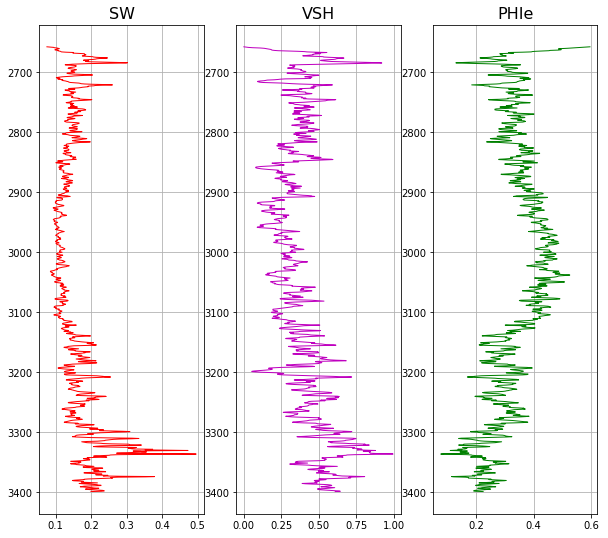

In [3]:
GR   = np.array(DP1['GR'])
ILD  = np.array(DP1['ILD'])
NPHI = np.array(DP1['NPHI'])

VSH = np.array(vsh_1(GR))

nphi = []
phie = []
for i in range(len(NPHI)):
    nphi.append(NPHI[i]/100.0)
    phie.append(NPHI[i]/100.0 - (VSH[i]*0.45))

NPHI = np.array(nphi)
PHIe = np.array(phie)

#---------------------------------------#
SW_O = []
for i in range(len(GR)):
    SW_O.append(simandoux(VSH[i],ILD[i],PHIe[i]))

graficos_3(DP1['PROF'],SW_O,VSH,PHIe,label1 = 'SW',label2 = 'VSH',label3 = 'PHIe')

<big><big><big>$Sw = \left(\frac{a}{\phi ^m} . \frac{Rw}{Rt} \right)^{(1/n)}$
    
_________________________________________
    
<br><br>$\frac{\partial Sw}{\partial a} =\frac{ \left(\frac{a}{\phi ^m} . \frac{Rw}{Rt} \right)^{(1/n)} } {a.n}$

<br><br>$\frac{\partial Sw}{\partial Rw} = \frac{ \left(\frac{a}{\phi ^m} . \frac{Rw}{Rt} \right)^{(1/n)} } {Rw. n}$

<br><br>$\frac{\partial Sw}{\partial m} = \frac{ log(\phi) \left(\frac{a}{\phi ^m} . \frac{Rw}{Rt} \right)^{(1/n)} } {n}$

<br><br>$\frac{\partial Sw}{\partial n} = \frac{ log \left(\frac{a}{\phi ^m} . \frac{Rw}{Rt} \right) \left(\frac{a}{\phi ^m} . \frac{Rw}{Rt} \right)^{(1/n)} } {n^2} $



In [4]:
def Sw(PHI,RT,Rw = 0.015,a=0.62,m=2.15,n=2.0):
    sw = ((a*Rw)/((PHI**m)*RT))**(1/n)
    return sw

#---------------------------------------------#

def Sw_Rw(PHI,RT,Rw = 0.015,a=0.62,m=2.15,n=2.0):
    sw = (((a*Rw)/((PHI**m)*RT))**(1/n))/(Rw*n)
    return sw

#---------------------------------------------#

def Sw_a(PHI,RT,Rw = 0.015,a=0.62,m=2.15,n=2.0):
    sw = (((a*Rw)/((PHI**m)*RT))**(1/n))/(a*n)
    return sw

#---------------------------------------------#

def Sw_m(PHI,RT,Rw = 0.015,a=0.62,m=2.15,n=2.0):
    sw = (np.log(PHI)*(((a*Rw)/((PHI**m)*RT))**(1/n)))/n
    return sw

#---------------------------------------------#

def Sw_n(PHI,RT,Rw = 0.015,a=0.62,m=2.15,n=2.0):
    A = (a*Rw)/((PHI**m)*RT)
    sw = (np.log(A)*(A**(1/n)))/(n**2)
    return sw

In [5]:
C0 = [0.015,0.62,2.15,2.0]

n = len(GR)

C02 = np.array(C0)

dRw = []
da  = []
dm  = []
dn  = []

Swm = []
r   = []

for i in range(n):
    dRw.append(Sw_Rw(PHIe[i],ILD[i],C0[0],C0[1],C0[2],C0[3]))
    da.append(Sw_a(PHIe[i],ILD[i],C0[0],C0[1],C0[2],C0[3]))
    dm.append(Sw_m(PHIe[i],ILD[i],C0[0],C0[1],C0[2],C0[3]))
    dn.append(Sw_n(PHIe[i],ILD[i],C0[0],C0[1],C0[2],C0[3]))
    
    r.append(SW_O[i] - Sw(PHIe[i],ILD[i],C0[0],C0[1],C0[2],C0[3]))
    
#--------------------------------------------------------#
J = np.array([dRw,da,dm,dn]).T
r = np.array(r).T

#JJ = np.dot(J,np.transpose(J))
JJ = np.dot(np.transpose(J),J)
print(JJ)

JI = np.linalg.inv(JJ)

JT = np.dot(JI,np.transpose(J))
print(np.shape(JT))
JR = np.dot(JT,r)
C1 = C02 - JR
print(C02)
print(C1)

[[ 4.69096683e+04  1.13491133e+03 -9.53359928e+02 -1.14638264e+03]
 [ 1.13491133e+03  2.74575322e+01 -2.30651595e+01 -2.77350639e+01]
 [-9.53359928e+02 -2.30651595e+01  2.08999827e+01  2.15838779e+01]
 [-1.14638264e+03 -2.77350639e+01  2.15838779e+01  2.99927759e+01]]
(4, 1483)
[0.015 0.62  2.15  2.   ]
[0.00420085 0.84213254 1.83993349 1.96742196]


In [126]:
def restriction(C1,C2,c_min):
    
    dif = [] # vector
    for i in range(len(C1)):
        dif.append(C2[i] - C1[i])

    #print(dif)

    #------------------------------------------------------------#
    h = False
    dict_ = {}
    for i in range(len(C1)):
        if C2[i] < c_min[i]:
            h = True
            dict_ [C2[i]] = i
            #print(C2[i],dif[i],C1[i] - c_min[i],c_min[i] - C2[i])
            
    #------------------------------------------------------------#

    if h:
        min_idx = min(dict_.keys() )
        min_idx = dict_[min_idx]
        #print(dict_[min_idx])

        t = (C2[min_idx] - (c_min[min_idx]) )/(-dif[min_idx])
        #print(t)

        C2A = np.array(C2)
        CMA = t*np.array(dif)
        #print(C2A + CMA)
        return C2A + CMA
    else:
        return C2
        #print('oi')

In [138]:
interacoes = 100

C0 = [0.065,0.81,2.15,2.0]
#C0 = [10,9,8,1]

#Rw, a, m, n

#zero = 0.001
#mm = [zero,zero,zero,zero]
mm = [0.015,0.2,1.5,1.0]

n = len(GR)

C02 = np.array(C0)

for j in range(interacoes):

    dRw = []
    da  = []
    dm  = []
    dn  = []

    Swm = []
    r   = []

    for i in range(n):
        dRw.append(Sw_Rw(PHIe[i],ILD[i],C0[0],C0[1],C0[2],C0[3]))
        da.append(Sw_a(PHIe[i],ILD[i],C0[0],C0[1],C0[2],C0[3]))
        dm.append(Sw_m(PHIe[i],ILD[i],C0[0],C0[1],C0[2],C0[3]))
        dn.append(Sw_n(PHIe[i],ILD[i],C0[0],C0[1],C0[2],C0[3]))

        r.append(SW_O[i] - Sw(PHIe[i],ILD[i],C0[0],C0[1],C0[2],C0[3]))

    #--------------------------------------------------------#

    J = np.array([dRw,da,dm,dn]).T
    r = np.array(r).T

    #JJ = np.dot(J,np.transpose(J))
    JJ = np.dot(np.transpose(J),J)
    #print(JJ)

    JI = np.linalg.inv(JJ)

    JT = np.dot(JI,np.transpose(J))
    #print(np.shape(JT))
    JR = np.dot(JT,r)
    print(C02)
    C1 = C02 - JR*0.01
    #C02 = C02 - JR
    
    #--------------------------------------------------------#
    # Restricao
    
    C02 = restriction(C02,C1,mm)

[0.065 0.81  2.15  2.   ]
[0.06910759 0.76338922 2.14869684 1.99986308]
[0.07321519 0.71677845 2.14739368 1.99972616]
[0.07732278 0.67016767 2.14609053 1.99958924]
[0.08143037 0.6235569  2.14478737 1.99945232]
[0.08553797 0.57694612 2.14348421 1.9993154 ]
[0.08964556 0.53033535 2.14218105 1.99917848]
[0.09375316 0.48372457 2.14087789 1.99904156]
[0.09786075 0.4371138  2.13957473 1.99890464]
[0.10196834 0.39050302 2.13827158 1.99876772]
[0.10607594 0.34389225 2.13696842 1.9986308 ]
[0.11018353 0.29728147 2.13566526 1.99849388]
[0.11429112 0.25067069 2.1343621  1.99835696]
[0.11839872 0.20405992 2.13305894 1.99822004]
[0.1187565  0.2        2.13294543 1.99820811]
[0.1187565  0.2        2.13294543 1.99820811]
[0.1187565  0.2        2.13294543 1.99820811]
[0.1187565  0.2        2.13294543 1.99820811]
[0.1187565  0.2        2.13294543 1.99820811]
[0.1187565  0.2        2.13294543 1.99820811]
[0.1187565  0.2        2.13294543 1.99820811]
[0.1187565  0.2        2.13294543 1.99820811]
[0.11875

In [130]:
zero = 0.0000001

C0 = [0.015,0.62,2.15,2.0]
C1 = [0.00420085, 0.84213254, 1.83993349, 1.96742196]
C2 = [-0.0065983, 1.06426508, -1.52986699, 1.93484392]

c_min = [zero,zero,zero,zero]
c_max = [4.0,1.0,3.0,3.0]

dif = [] # vector
for i in range(len(C1)):
    dif.append(C2[i] - C1[i])
    
print(dif)
    
#------------------------------------------------------------#
dict_ = {}
for i in range(len(C1)):
    if C2[i] < c_min[i]:
        h = True
        dict_ [C2[i]] = i
        print(C2[i],dif[i],C1[i] - c_min[i],c_min[i] - C2[i])
    
if h:
    print('sim')

[-0.01079915, 0.22213253999999993, -3.36980048, -0.032578039999999975]
-0.0065983 -0.01079915 0.00420075 0.0065984
-1.52986699 -3.36980048 1.83993339 1.52986709
sim


In [139]:
min_idx = max(dict_.keys() )
min_idx = dict_[min_idx]
#print(dict_[min_idx])

t = (C2[min_idx] - c_min[min_idx])/(-dif[min_idx])
print(t)

C2A = np.array(C2)
CMA = t*np.array(dif)
print(C2A + CMA)
#print(dif)
#print(CMA)



-0.6110110517957431
[1.00000000e-07 9.28539643e-01 5.29118346e-01 1.95474946e+00]


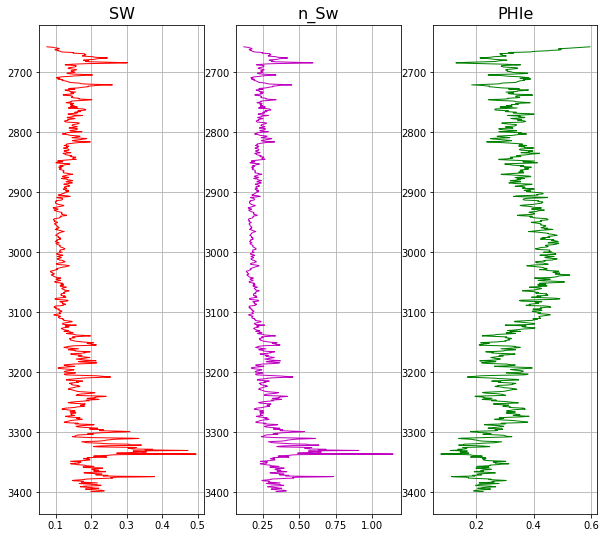

In [140]:
n_Sw = []
for i in range(n):
    n_Sw.append(Sw(PHIe[i],ILD[i],C02[0],C02[1],C02[2],C02[3]))
    
graficos_3(DP1['PROF'],SW_O,n_Sw,PHIe,label1 = 'SW',label2 = 'n_Sw',label3 = 'PHIe')